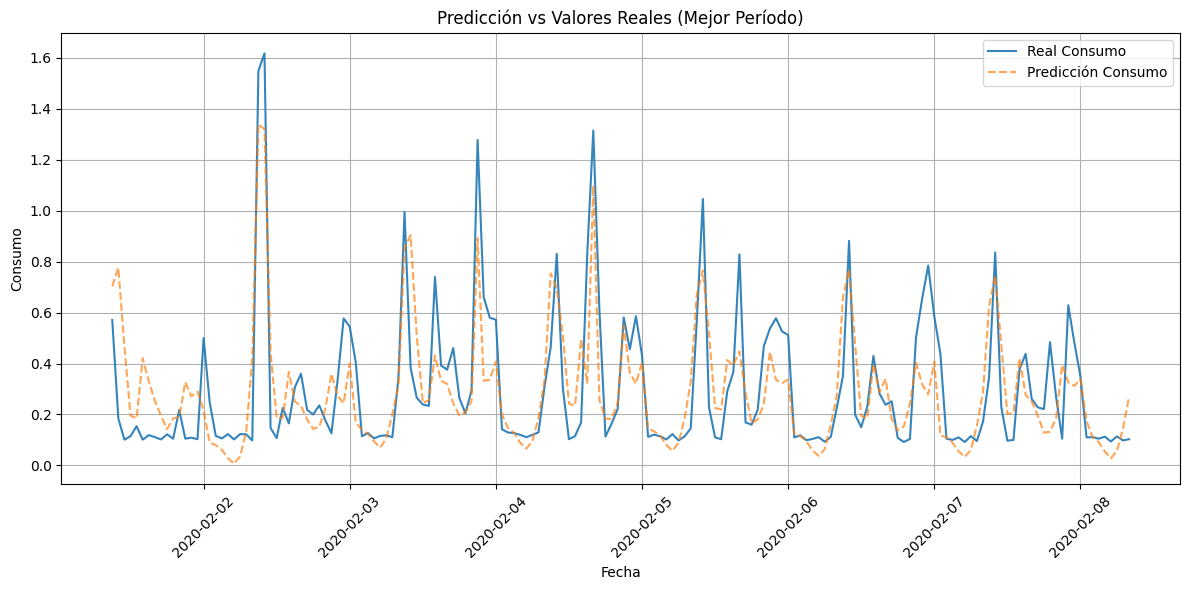

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('predicciones_consumo.csv')

# Convertir la columna 'fecha' a tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Ordenar por fecha para asegurar que los datos estén en orden cronológico
df = df.sort_values(by='fecha')

# Calcular el error promedio para cada ventana de 24*7 horas (168 horas)
window_size = 24*7  # 24*7 horas
df['rolling_error'] = df['error'].rolling(window=window_size).mean()

# Encontrar el índice del menor error promedio
min_error_index = df['rolling_error'].idxmin()

# Seleccionar el mejor período de 168 horas
best_period = df.iloc[min_error_index - window_size + 1:min_error_index + 1]

# Graficar valores reales vs predichos para el mejor período
plt.figure(figsize=(12, 6))
plt.plot(best_period['fecha'], best_period['real_consumo'], label='Real Consumo', alpha=0.9)
plt.plot(best_period['fecha'], best_period['pred_consumo'], label='Predicción Consumo', alpha=0.7, linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.title('Predicción vs Valores Reales (Mejor Periodo)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Mostrar fecha y hora de inicio y fin del mejor periodo
inicio = best_period['fecha'].min()
fin = best_period['fecha'].max()

print(f"Mejor periodo: desde {inicio} hasta {fin}")


Mejor periodo: desde 2020-02-01 09:00:00 hasta 2020-02-08 08:00:00
